# A Naive Bayes classifier

## Introduction

In this notebook, we will train parameters of a Naive Bayes classifier using *online* learning.  

The class conditional density is a product of one dimensional densities: $p(\mathbb{x}|y=c,\mathbb{\theta}) = \prod_{d=1}^{D} p(x_{d}|y=c,\mathbb{\theta_{d,c}})$, where $D$ is the number of features. We assume that the features $\mathbb{x}$ are independent. 

In our example, we will use real-valued features and use Gaussian distributions, $p(\mathbb{x}|y=c,\mathbb{\theta}) = \prod_{j=1}^{D}\mathcal{N}(x_{d}|\mu_{d,c},\sigma_{d,c}^{2})$, where $\mu_{d,c}$ is the mean of feature $d$ in components of class $c$, and $\sigma_{d,c}^{2}$ is its variance. 

<center><img src="bayes-net.png" width="200"><center>

The idea is to create dependence between instances of $\mu$ and $\sigma^2$ for each training step $n$.

Please see resources below for more information:

- Bishop, Christopher M. Pattern recognition and machine learning. springer, 2006.
- Murphy, Kevin P. Machine learning: a probabilistic perspective. MIT press, 2012.

### Setup

In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.animation
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.animation import FuncAnimation

### Config

In [2]:
model_dir = Path('../models/model/')
data_dir = Path('../data/')

### Generate data

In [3]:
def sample_component(component, means, covars):
    if component == 0:
        return np.random.multivariate_normal(means[0], covars[0], 1).T   
    if component == 1:
        return np.random.multivariate_normal(means[1], covars[1], 1).T

In [4]:
N = 1000
num_dist = 10
num_samples = int(N / num_dist)

theta = np.linspace(0, 2*np.pi, num_dist)
r = np.sqrt(200)
x0 = r * np.cos(theta)
x1 = r * np.sin(theta)

In [5]:
df_temp = []

for i in range(num_dist):
    # specify class distributions
    class0_weight = 0.5
    class1_weight = 0.5

    class0_means = [x0[i], x1[i]]

    class0_covar = [[1, 0],
                    [0, 1]]

    class1_means = [x0[i]+2, x1[i]+2]

    class1_covar = [[1, 0],
                    [0, 1]]
    
    means = [class0_means, class1_means]
    covars = [class0_covar, class1_covar]
    
    mask = np.random.choice([0, 1], num_samples, p=[class0_weight, class1_weight])
    data = [sample_component(i, means, covars) for i in mask]
    data = np.array(data).reshape(num_samples, 2)
    df_data = pd.DataFrame(data, columns=['x0', 'x1'])
    df_data['class'] = mask
    df_temp.append(df_data)
df_data = pd.concat(df_temp).reset_index().drop(columns=['index'], axis=1)
# store dataset
df_data.to_csv(data_dir/'data.csv', sep='|', header=False, index=False)

In [6]:
# peak of our data set
# plt.scatter(df_data['x0'],
#             df_data['x1'],
#             c=df_data['class'])
# plt.title("Data")
# plt.xlabel(r"$x_0$")
# plt.ylabel(r"$x_1$")
# plt.grid()
# plt.show()

### Running model

In [7]:
# run c# Infer.NET code
cmd = f'dotnet run --project {model_dir} {data_dir}/ data.csv'
cmd

'dotnet run --project ../models/model ../data/ data.csv'

In [8]:
!{cmd}

=======

### Results

In [9]:
# load results from file
df_result = pd.read_csv(data_dir/'results.csv', sep='|')

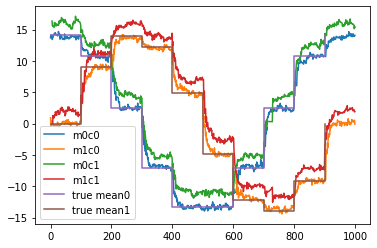

In [10]:
plt.plot(df_result['meanPost0'], label='m0c0')
plt.plot(df_result['meanPost1'], label='m1c0')
plt.plot(df_result['meanPost2'], label='m0c1')
plt.plot(df_result['meanPost3'], label='m1c1')
plt.step(np.arange(0, N, num_samples), x0, where='post', label='true mean0')
plt.step(np.arange(0, N, num_samples), x1, where='post', label='true mean1')
plt.legend()
plt.show()